In [1]:
# Notebook configuration
LATEST_FVS_RESULTS_DIR = "./results/fvs"

# NOTE: change this path to your local NAS1 mount path
#GT_DIR = "/Users/sabrina/mnt/nas1/fvs_benchmark_datasets" 
GT_DIR = "/home/sabrina/nas1/fvs_benchmark_datasets"

In [2]:
# Python imports

import os
import json
import re

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib widget
import ipywidgets as widgets

In [3]:
# Prechecks


if not os.path.exists(LATEST_FVS_RESULTS_DIR):
    raise Exception("Cannot find %s.  Did you run 'rsync_from_nas.sh'?" % LATEST_FVS_RESULTS_DIR)

if not os.path.exists(GT_DIR):
    raise Exception("Cannot find %s.  Did you mount NAS1 locally and change the config above?" % GT_DIR)

In [4]:
#
# Load the latest FVS benchmark data
#

In [5]:
def size_num(s):
    '''get raw numercs of text abbrev'''
    if s == '1M': return 1000000
    elif s == '2M': return 2000000
    elif s == '5M': return 5000000
    elif s == '10M': return 10000000
    elif s == '20M': return 20000000
    elif s == '50M': return 50000000
    elif s == '100M': return 100000000
    elif s == '200M': return 200000000
    elif s == '250M': return 250000000
    elif s == '500M': return 500000000
    elif s == '10K': return 10000
    else: raise Exception("Unsupported size " + s)

In [6]:
# Load all the FVS benchmarks into one data frame

csvs = []

# locate a .csv files in the results data dir
for root, dir, files in os.walk(LATEST_FVS_RESULTS_DIR):
    #print(root,dir)
    for file in files:
        
        if file.endswith(".csv"):
            fpath = os.path.join(root, file)
            csvs.append(fpath)
if len(csvs)==0:
    raise Exception("No CSVs found!")
print("found %d CSV files" % len(csvs))

# load all data frames
dfs = []
for csv in csvs:
    df = pd.read_csv(csv)
    # find host
    if csv.find("apu11")>=0:
        df['host']="apu11"
    elif csv.find("apu12")>=0:
        df['host']="apu12"
    else:
        raise Exception("host machine not known for" ,csv )

    # get numrecs col
    # ./results/fvs/sv7-apu12/all_09142023/qbq/benchmarks-deep50M-q1000-qbq-clusters-256-1694769120.csv
    size_str = os.path.basename(csv).split(".")[0].split("-")[1][4:]
    df['numrecs'] = size_num(size_str)

    # get bits
    bits_str = os.path.basename(csv).split(".")[0].split("-")[5]
    df['bits'] = int(bits_str)

    
    dfs.append(df)

# concat into one master
print("Concatenating into one master dataframe...")
df_fvs = pd.concat( dfs )
print("There are %d rows" % df_fvs.shape[0])
df_fvs.head(10)

found 74 CSV files
Concatenating into one master dataframe...
There are 74074 rows


,type,fvs_version,allocationid,datasetid,dataset_path,queries_path,bits,ts_start,ts_train_start,ts_train_end,ts_train_walltime,ts_query_start,ts_query_end,ts_query_walltime,response,recall,host,numrecs
0,train,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,/mnt/nas1/fvs_benchmark_datasets/deep-10M.npy,NaN,128,Thu Sep 14 21:48:22 2023,1.694753e+09,1.694754e+09,1178.232852,NaN,NaN,NaN,NaN,NaN,apu12,10000000
1,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__0.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.034183,0.028239,1.0,apu12,10000000
2,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__1.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.032082,0.026690,0.8,apu12,10000000
3,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__2.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.026284,0.021634,0.9,apu12,10000000
4,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__3.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.026364,0.022113,0.9,apu12,10000000
5,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__4.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.023939,0.019321,1.0,apu12,10000000
6,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__5.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.025702,0.021230,1.0,apu12,10000000
7,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__6.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.023537,0.018992,1.0,apu12,10000000
8,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__7.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.025308,0.020786,0.9,apu12,10000000
9,search,0.9.5.4,fvs-automation,c9b3b9bb-6729-4416-9666-9ff429d8f728,NaN,/home/public/deep-queries-1000__8.npy,128,Thu Sep 14 21:48:22 2023,NaN,NaN,NaN,1.694755e+09,1.694755e+09,0.028385,0.023743,1.0,apu12,10000000


latest gsi fvs train time [1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.03196123139063517, 0.12123428763283624, 0.3170121314062012, 0.38832683379782573, 0.8462816421522035, 1.1834016929864883, 1.7886218697991636, 3.6511264656815263, 6.8104497740334935]


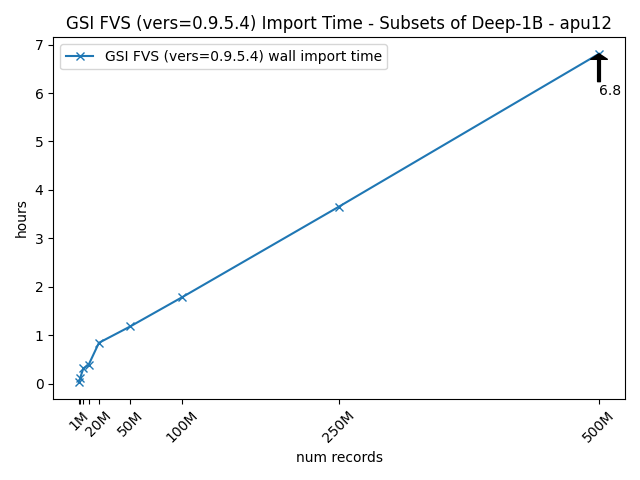

In [7]:
# plot one line of latest, matching label with the og notebook 
# Plot import/train times

# compute average wall import time via groupby
avg_wall_import_time = \
    df_fvs.groupby( [ 'numrecs' ] ) ['ts_train_walltime'].mean()

# get the plot points for import time
xs = []
ys = []
for idx in avg_wall_import_time.index:
    x = idx
    xs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    ys.append(y)
print("latest gsi fvs train time", xs, ys)

# plot the lines and label the plot
fig, ax = plt.subplots()

#
# only show the wall time lines
#
ax.plot(xs, ys, marker='x', label="GSI FVS (vers=0.9.5.4) wall import time")
ax.set_ylabel('hours')
ax.set_xlabel('num records')
ax.set_xticks(xs)

# don't show all xticks near the start since they bunch up
ax.set_xticklabels(['1M', '', '', '', '20M', '50M', '100M', '250M', '500M'], rotation = 45)

#
# annotate last data point in lines of interest
latest_hours = "%.1f" % ys[-1]
ax.annotate(latest_hours, xy=(xs[-1],ys[-1]), xytext=(0.0,-30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )

ax.set_title("GSI FVS (vers=0.9.5.4) Import Time - Subsets of Deep-1B - apu12")
ax.legend(loc='best')
fig.tight_layout()
fig.savefig("results/latest_fvs_wall_import_time_ad.png")

In [8]:
def format_size(size):
    if size < 1000000:      
        return str(size)[:-3]+'K'
    elif size < 1000000000:
        return str(size)[:-6]+'M'
    else:
        return str(size)[:-9]+'B'

interactive(children=(FloatSlider(value=1.0, description='a', max=1.0), Output()), _dom_classes=('widget-inter…

interactive(children=(Checkbox(value=False, description='LATEST_pareto'), Output()), _dom_classes=('widget-int…

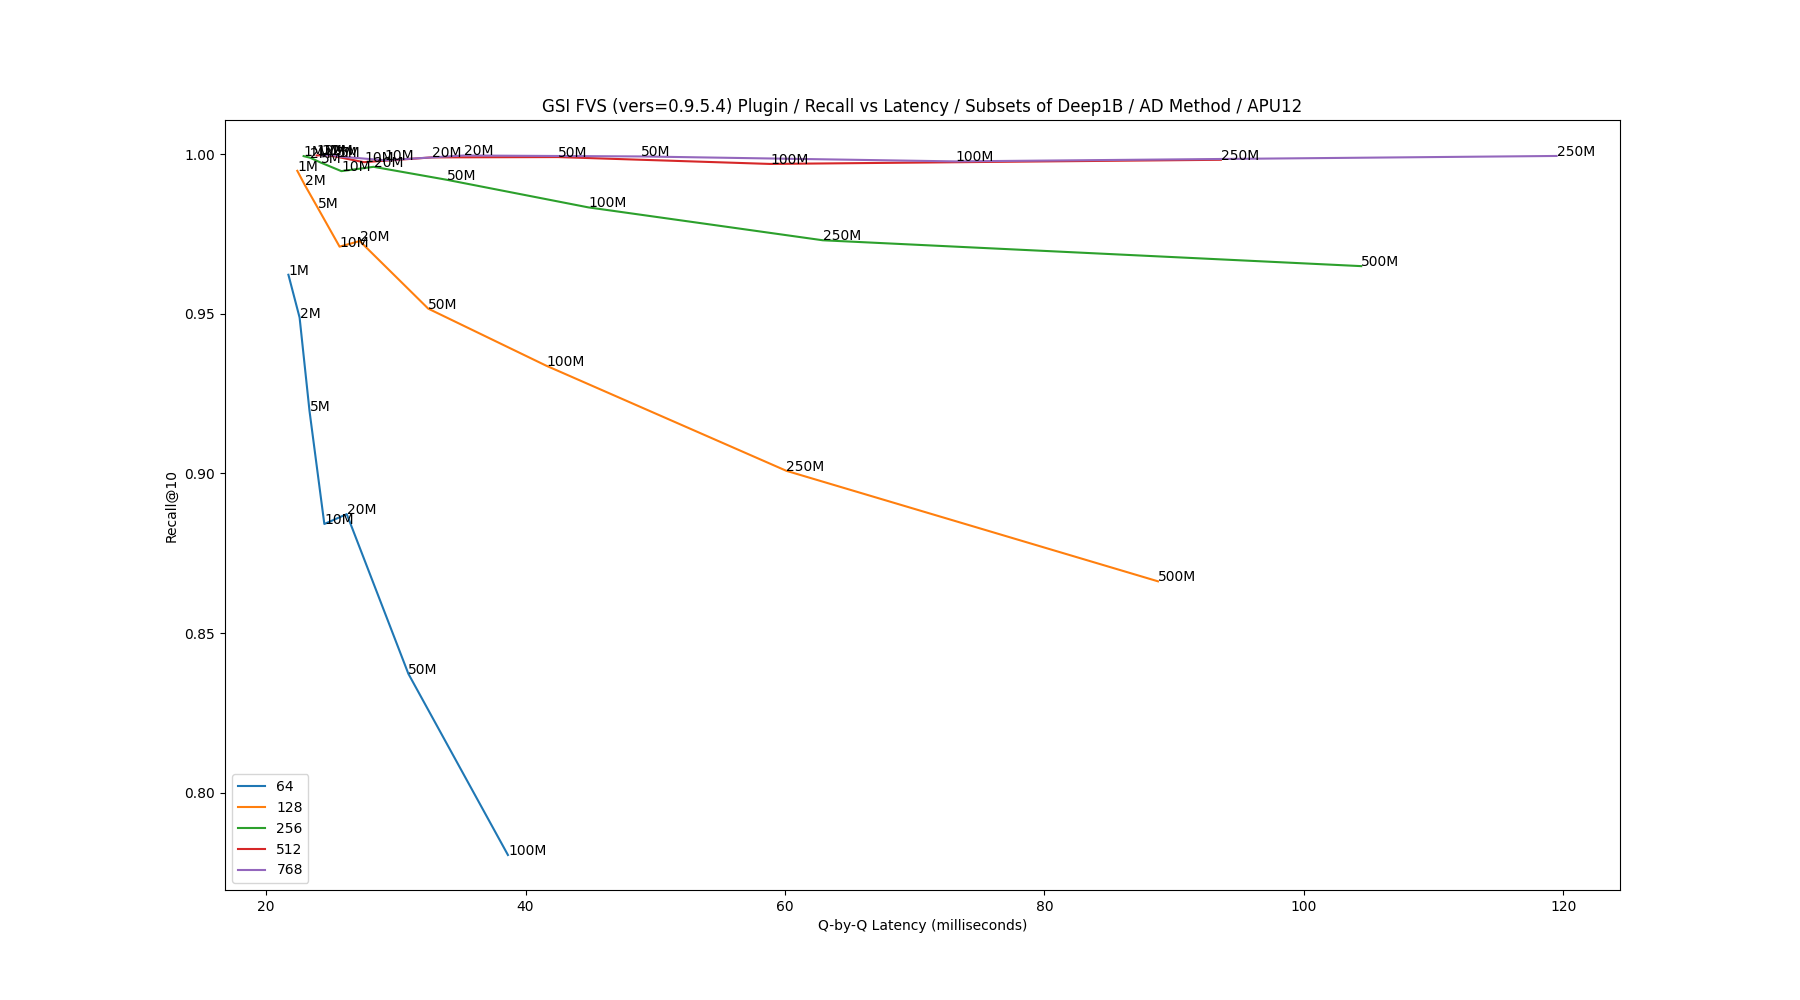

In [9]:
avg_search_time = \
    df_fvs.groupby( [ 'numrecs' , 'bits'] ) [['ts_query_walltime', 'recall']].mean()

x = avg_search_time.reset_index()
x['ts_query_walltime'] = x['ts_query_walltime'].apply(lambda x: x*1000)

# plot one line for latest
ann_list, lines = [], []
latest_pareto_list = []
def set_graph(a):
    global ann_list
    global lines
    for ef in x.bits.unique():
        tmp = x[x.bits == ef]
        lines.append(plt.plot(tmp.ts_query_walltime, tmp.recall, label = str(ef), alpha=a))
        for i, j, s in zip(tmp.ts_query_walltime, tmp.recall, tmp.numrecs):
            ann_list.append(plt.annotate(format_size(s), (i,j), alpha=a))
        

fig, ax = plt.subplots(figsize=(18,10))
@widgets.interact(a=(0,1,0.1))
def update(a=1.0):
    global ann_list
    global lines
    for ann in ann_list:
        ann.remove()
    ann_list[:] = []
    [line.pop(0).remove() for line in lines if len(line) > 0]
    lines[:] = []
    set_graph(a)

latest_pareto_list = []
@widgets.interact(LATEST_pareto=False)
def show_gsi_pareto(LATEST_pareto):
    global latest_pareto_list
    if LATEST_pareto:
        for size in x.numrecs.unique():
            if size < 10000000:
                continue
            tmp = x[x.numrecs == size]
            latest_pareto_list.append(plt.plot(tmp.ts_query_walltime, tmp.recall, color='black', linestyle='dashed'))
    else:
        [line.pop(0).remove() for line in latest_pareto_list]
        latest_pareto_list = []



ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
ax.set_title("GSI FVS (vers=0.9.5.4) Plugin / Recall vs Latency / Subsets of Deep1B / AD Method / APU12")
ax.legend()
fig.savefig("results/latest_fvs_recall_latency_0954.png")

### Compare

In [10]:
# load hnsw and gsi fvs df
summary_hnsw_df = pd.read_csv("./results/prev_hnsw_subset-deep1b_summary.csv")
summary_gsi_df = pd.read_csv("./results/prev_gsi_fvs_subset-deep1b_summary.csv")


In [11]:
summary_gsi_df.head()

,Unnamed: 0,bits,numrecs,recall10_mean,search_mean,import_time,wall_time
0,0,64,1000000,0.9624,22.011360,2.233583,2.233616
1,1,64,2000000,0.9474,22.492887,4.389998,4.390045
2,2,64,5000000,0.9233,23.612933,10.721548,10.721599
3,3,64,10000000,0.8865,24.905373,18.433649,18.433715
4,4,64,20000000,0.8889,26.472284,35.921844,35.921897


hnsw train time [10000, 1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.0003818066666666668, 0.14540470305555553, 0.2352491308333334, 1.0013319272222223, 2.179133355833333, 8.664645293055555, 19.848325099722224, 39.44160888972221, 237.5416018741666, 432.4261059541668]
hnw wall import time [10000, 1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.00038237222222222214, 0.1454839922222222, 0.23534187722222216, 1.0016525494444444, 2.1797027099999995, 8.666903835555555, 19.852297736944447, 39.448619405555576, 237.57768246083327, 432.46582268555557]
fvs wall import time [1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.0006943638194444445, 0.0012784595833333333, 0.0028902134027777777, 0.005134871597222223, 0.008656174444444446, 0.21940947631944452, 1.366615162847222, 3.6575001150000004, 4.710088842222222]
fvs wall import time [1000000, 2000000, 5000000, 10000000

/tmp/ipykernel_1525220/3003046557.py:86: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(hnsw_hours, xy=(wxs[-1],wys[-1]), xytext=(0.0,-30),
/tmp/ipykernel_1525220/3003046557.py:91: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(gsi_hours, xy=(wxgs[-1], wygs[-1]), xytext=(0.0,30),
/tmp/ipykernel_1525220/3003046557.py:96: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.annotate(latest_hours, xy=(lxs[-1], lys[-1]), xytext=(-30,30),


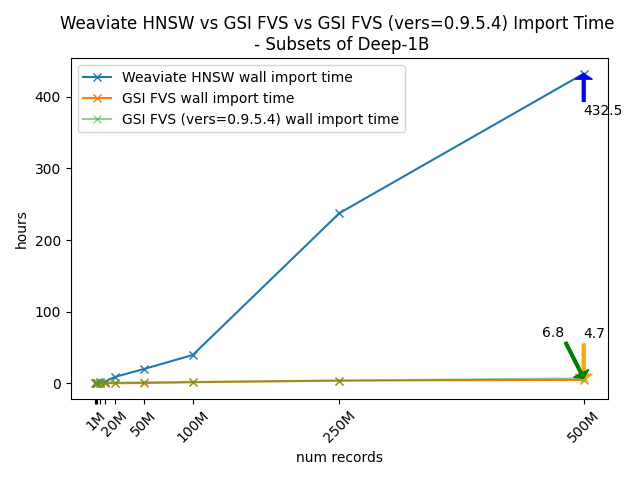

In [12]:
# plot import/train times

# compute average train time via groupby
avg_import_time = \
    summary_hnsw_df.groupby( [ 'numrecs' ] ) ['import_time'].mean()

# compute average wall import time via groupby
avg_wall_import_time = \
    summary_hnsw_df.groupby( [ 'numrecs' ] ) ['wall_time'].mean()

# get the plot points for import time
xs = []
ys = []
for idx in avg_import_time.index:
    x = idx
    xs.append(x)
    y = avg_import_time[idx]/(60.0*60.0)
    ys.append(y)
print("hnsw train time", xs,ys)

# get the plot points for wall import time
wxs = []
wys = []
for idx in avg_wall_import_time.index:
    x = idx
    wxs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    wys.append(y)
print("hnw wall import time", wxs,wys)

avg_import_time = \
    summary_gsi_df.groupby(['numrecs'])['import_time'].mean()
avg_wall_import_time = \
    summary_gsi_df.groupby(['numrecs'])['wall_time'].mean()
xgs = []
ygs = []
for idx in avg_import_time.index:
    x = idx
    xgs.append(x)
    y = avg_import_time[idx]/(60.0*60.0)
    ygs.append(y)
print("fvs wall import time", xgs,ygs)

wxgs = []
wygs = []
for idx in avg_wall_import_time.index:
    x = idx
    wxgs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    wygs.append(y)
print("fvs wall import time", wxgs,wygs)

# compute average wall import time via groupby
avg_wall_import_time = \
    df_fvs.groupby( [ 'numrecs' ] ) ['ts_train_walltime'].mean()

# get the plot points for import time
lxs = []
lys = []
for idx in avg_wall_import_time.index:
    x = idx
    lxs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    lys.append(y)
print("latest gsi fvs train time", lxs, lys)

# plot the lines and label the plot
fig, ax = plt.subplots()

#
# only show the wall time lines
#
ax.plot(wxs,wys, marker='x', label="Weaviate HNSW wall import time")
ax.plot(wxgs,wygs, marker='x', label="GSI FVS wall import time")
ax.plot(lxs, lys, marker='x', label="GSI FVS (vers=0.9.5.4) wall import time", alpha=0.5)
ax.set_ylabel('hours')
ax.set_xlabel('num records')
ax.set_xticks(xs)

# don't show all xticks near the start since they bunch up
ax.set_xticklabels(['', '1M','','','', '20M', '50M', '100M', '250M', '500M'], rotation = 45)

#
# annotate last data point in lines of interest
hnsw_hours = "%.1f" % wys[-1]
ax.annotate(hnsw_hours, xy=(wxs[-1],wys[-1]), xytext=(0.0,-30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4, color='blue'),
            )
gsi_hours = "%.1f" % wygs[-1]
ax.annotate(gsi_hours, xy=(wxgs[-1], wygs[-1]), xytext=(0.0,30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4, color='orange'),
            )
latest_hours = "%.1f" % lys[-1]
ax.annotate(latest_hours, xy=(lxs[-1], lys[-1]), xytext=(-30,30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4, color='green'),
            )

ax.set_title("Weaviate HNSW vs GSI FVS (ver=previous) vs GSI FVS (vers=0.9.5.4) Import Time \n - Subsets of Deep-1B")
ax.legend(loc='best')
fig.tight_layout()
fig.savefig("results/weaviate_hnsw_vs_fvs_wall_import_time_ad_0954.png")


interactive(children=(FloatSlider(value=1.0, description='a', max=1.0), Output()), _dom_classes=('widget-inter…

interactive(children=(Checkbox(value=False, description='GSI_pareto'), Output()), _dom_classes=('widget-intera…

interactive(children=(Checkbox(value=False, description='Weaviate_pareto'), Output()), _dom_classes=('widget-i…

interactive(children=(Checkbox(value=False, description='LATEST_pareto'), Output()), _dom_classes=('widget-int…

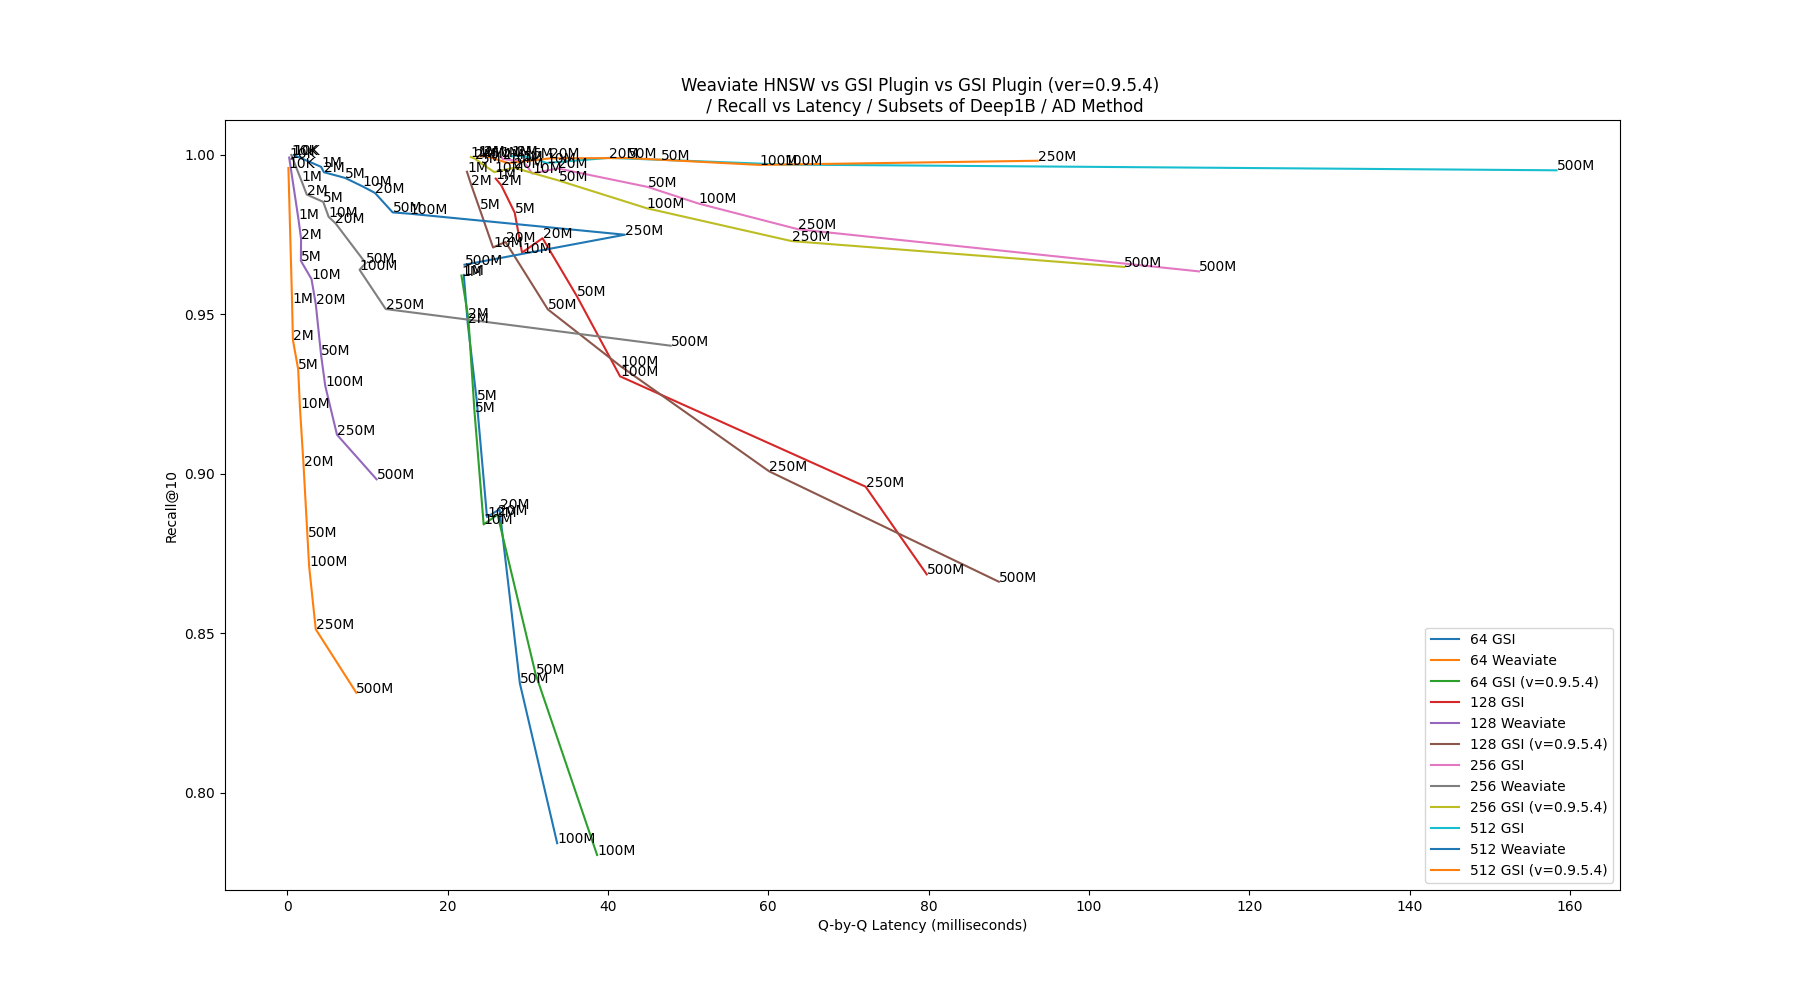

In [13]:
avg_search_time = \
    df_fvs.groupby( [ 'numrecs' , 'bits'] ) [['ts_query_walltime', 'recall']].mean()

x = avg_search_time.reset_index()
x['ts_query_walltime'] = x['ts_query_walltime'].apply(lambda x: x*1000)

ann_list, lines = [], []
gsi_pareto_list, pareto_list, latest_pareto_list = [], [], []
def set_graph(a):
    global ann_list
    global lines
    for ef in summary_gsi_df.bits.unique():
        # gsi fvs
        tmp = summary_gsi_df[summary_gsi_df.bits == ef]
        lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, label = str(ef) + ' GSI', alpha=a))
        for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
            ann_list.append(plt.annotate(format_size(s), (i,j), alpha=a))
        # hnsw
        tmp = summary_hnsw_df[summary_hnsw_df.ef == ef]
        lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, label = str(ef) + " Weaviate", alpha=a))
        for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
            ann_list.append(plt.annotate(format_size(s), (i,j), alpha=a))
        # gsi fvs ver=0.9.5.4
        tmp = x[x.bits == ef]
        lines.append(plt.plot(tmp.ts_query_walltime, tmp.recall, label = str(ef) + ' GSI (v=0.9.5.4)', alpha=a))
        for i, j, s in zip(tmp.ts_query_walltime, tmp.recall, tmp.numrecs):
            ann_list.append(plt.annotate(format_size(s), (i,j), alpha=a))
            

fig, ax = plt.subplots(figsize=(18,10))
@widgets.interact(a=(0,1,0.1))
def update(a=1.0):
    global ann_list
    global lines
    for ann in ann_list:
        ann.remove()
    ann_list[:] = []
    [line.pop(0).remove() for line in lines if len(line) > 0]
    lines[:] = []
    set_graph(a)

gsi_pareto_list = []
@widgets.interact(GSI_pareto=False)
def show_gsi_pareto(GSI_pareto):
    global gsi_pareto_list
    if GSI_pareto:
        for size in summary_gsi_df.numrecs.unique():
            if size < 10000000:
                continue
            tmp = summary_gsi_df[summary_gsi_df.numrecs == size]
            gsi_pareto_list.append(plt.plot(tmp.search_mean, tmp.recall10_mean, color='black', linestyle='dashed'))
    else:
        [line.pop(0).remove() for line in gsi_pareto_list]
        gsi_pareto_list = []

pareto_list = []
@widgets.interact(Weaviate_pareto=False)
def show_weav_pareto(Weaviate_pareto):
    global pareto_list
    if Weaviate_pareto:
        for size in summary_hnsw_df.numrecs.unique():
            if size < 10000000:
                continue
            tmp = summary_hnsw_df[summary_hnsw_df.numrecs == size]
            pareto_list.append(plt.plot(tmp.search_mean, tmp.recall10_mean, color='black', linestyle='dashed'))
    else:
        [line.pop(0).remove() for line in pareto_list if len(line) > 0]
        pareto_list = []

latest_pareto_list = []
@widgets.interact(LATEST_pareto=False)
def show_gsi_pareto(LATEST_pareto):
    global latest_pareto_list
    if LATEST_pareto:
        for size in x.numrecs.unique():
            if size < 10000000:
                continue
            tmp = x[x.numrecs == size]
            latest_pareto_list.append(plt.plot(tmp.ts_query_walltime, tmp.recall, color='black', linestyle='dashed'))
    else:
        [line.pop(0).remove() for line in latest_pareto_list]
        latest_pareto_list = []


ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
ax.set_title("Weaviate HNSW vs GSI Plugin (ver=previous) vs GSI Plugin (ver=0.9.5.4) \n / Recall vs Latency / Subsets of Deep1B / AD Method")
ax.legend()
fig.savefig("results/hnsw_vs_gsi_latest_fvs_recall_latency_0954.png")

### compare FVS only

fvs wall import time [1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.0006943638194444445, 0.0012784595833333333, 0.0028902134027777777, 0.005134871597222223, 0.008656174444444446, 0.21940947631944452, 1.366615162847222, 3.6575001150000004, 4.710088842222222]
fvs wall import time [1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.0006943737500000001, 0.0012784729166666663, 0.0028902226388888893, 0.005134888888888889, 0.00865618715277778, 0.21940949034722212, 1.366615174513889, 3.6575001280555544, 4.710088857592593]
latest gsi fvs train time [1000000, 2000000, 5000000, 10000000, 20000000, 50000000, 100000000, 250000000, 500000000] [0.03196123139063517, 0.12123428763283624, 0.3170121314062012, 0.38832683379782573, 0.8462816421522035, 1.1834016929864883, 1.7886218697991636, 3.6511264656815263, 6.8104497740334935]


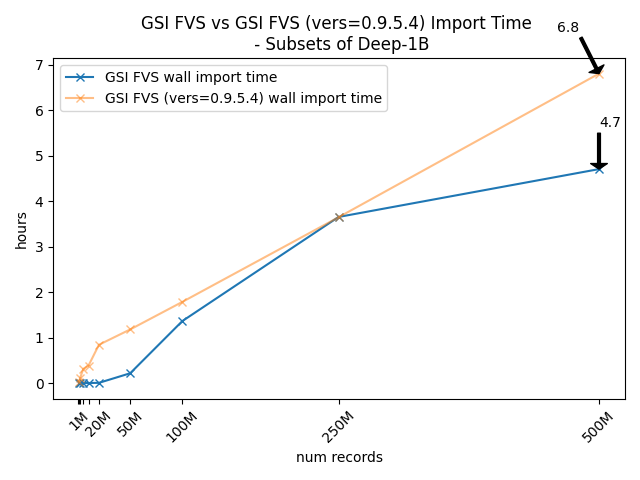

In [15]:
# plot import/train times

avg_import_time = \
    summary_gsi_df.groupby(['numrecs'])['import_time'].mean()
avg_wall_import_time = \
    summary_gsi_df.groupby(['numrecs'])['wall_time'].mean()
xgs = []
ygs = []
for idx in avg_import_time.index:
    x = idx
    xgs.append(x)
    y = avg_import_time[idx]/(60.0*60.0)
    ygs.append(y)
print("fvs wall import time", xgs,ygs)

wxgs = []
wygs = []
for idx in avg_wall_import_time.index:
    x = idx
    wxgs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    wygs.append(y)
print("fvs wall import time", wxgs,wygs)

# compute average wall import time via groupby
avg_wall_import_time = \
    df_fvs.groupby( [ 'numrecs' ] ) ['ts_train_walltime'].mean()

# get the plot points for import time
lxs = []
lys = []
for idx in avg_wall_import_time.index:
    x = idx
    lxs.append(x)
    y = avg_wall_import_time[idx]/(60.0*60.0)
    lys.append(y)
print("latest gsi fvs train time", lxs, lys)

# plot the lines and label the plot
fig, ax = plt.subplots()

#
# only show the wall time lines
#
ax.plot(wxgs,wygs, marker='x', label="GSI FVS wall import time")
ax.plot(lxs, lys, marker='x', label="GSI FVS (vers=0.9.5.4) wall import time", alpha=0.5)
ax.set_ylabel('hours')
ax.set_xlabel('num records')
ax.set_xticks(xs)

# don't show all xticks near the start since they bunch up
ax.set_xticklabels(['', '1M','','','', '20M', '50M', '100M', '250M', '500M'], rotation = 45)

#
# annotate last data point in lines of interest
gsi_hours = "%.1f" % wygs[-1]
ax.annotate(gsi_hours, xy=(wxgs[-1], wygs[-1]), xytext=(0.0,30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )
latest_hours = "%.1f" % lys[-1]
ax.annotate(latest_hours, xy=(lxs[-1], lys[-1]), xytext=(-30,30),
            textcoords="offset points",
            arrowprops=dict(facecolor='black',width=2,headlength=4),
            )

ax.set_title("GSI FVS (ver=previous) vs GSI FVS (vers=0.9.5.4) Import Time \n - Subsets of Deep-1B")
ax.legend(loc='best')
fig.tight_layout()
fig.savefig("results/gsi_fvs_vs_0954_wall_import_time_ad.png")


interactive(children=(FloatSlider(value=1.0, description='a', max=1.0), Output()), _dom_classes=('widget-inter…

interactive(children=(Checkbox(value=False, description='GSI_pareto'), Output()), _dom_classes=('widget-intera…

interactive(children=(Checkbox(value=False, description='LATEST_pareto'), Output()), _dom_classes=('widget-int…

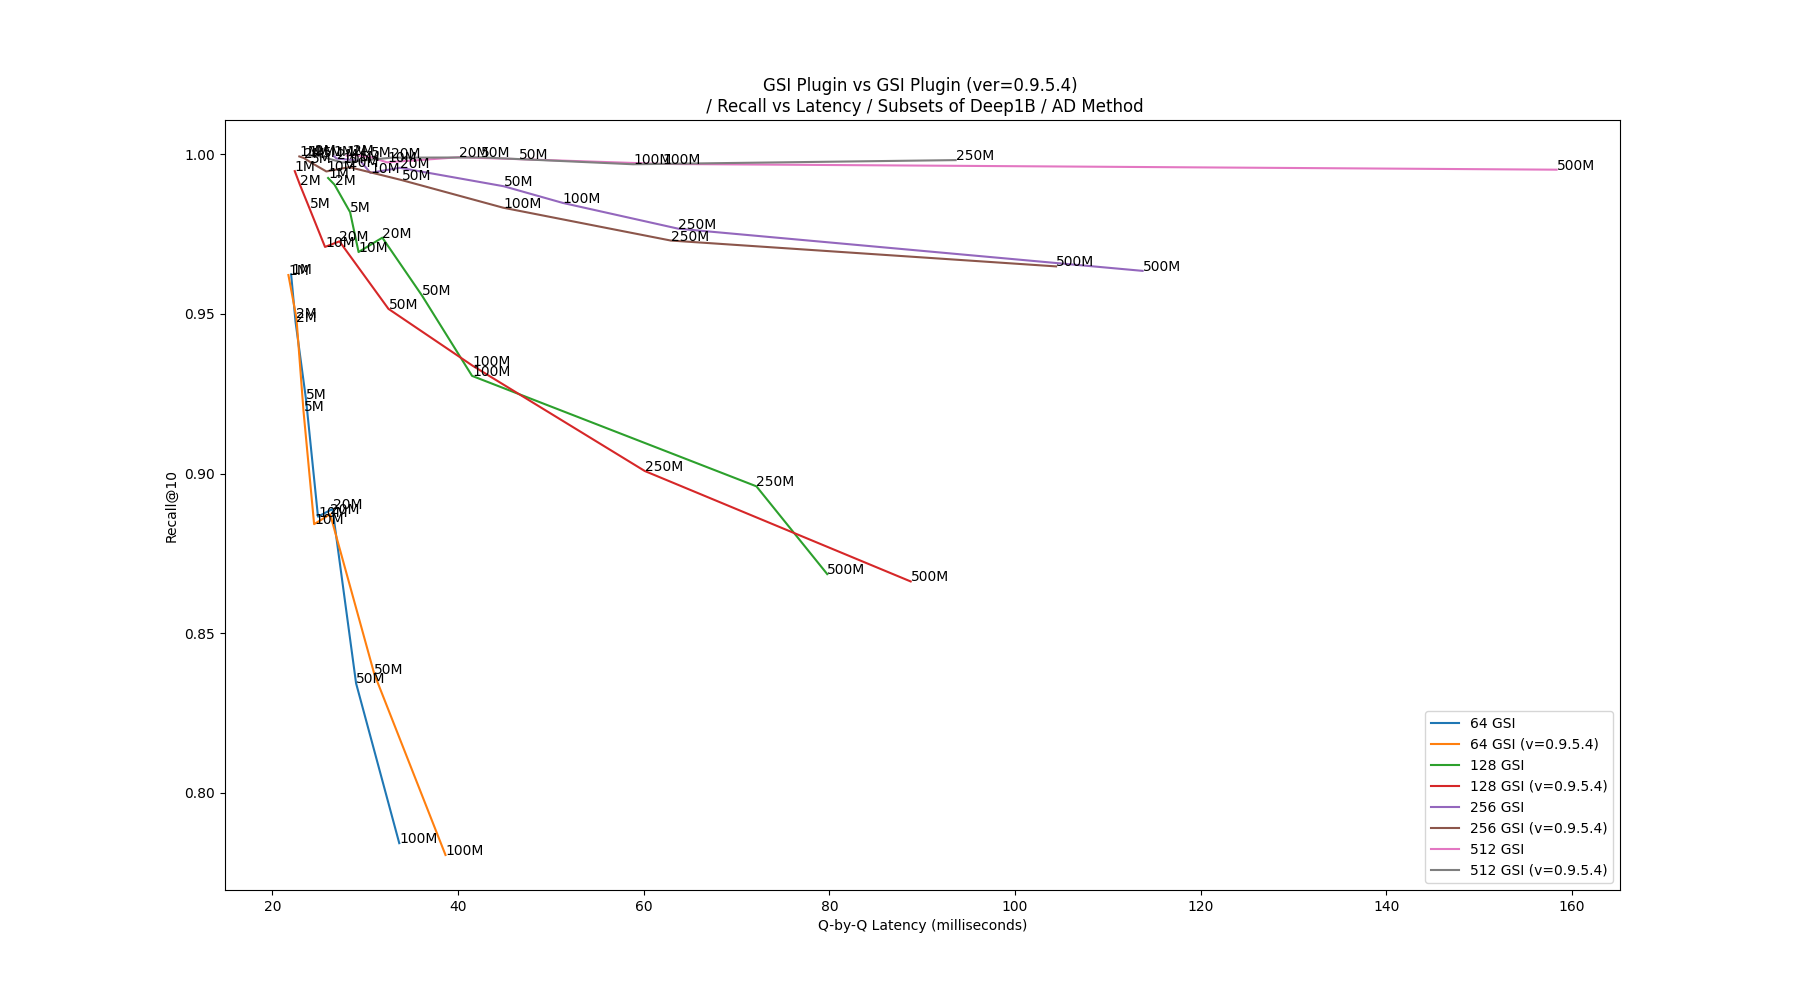

In [16]:
avg_search_time = \
    df_fvs.groupby( [ 'numrecs' , 'bits'] ) [['ts_query_walltime', 'recall']].mean()

x = avg_search_time.reset_index()
x['ts_query_walltime'] = x['ts_query_walltime'].apply(lambda x: x*1000)

ann_list, lines = [], []
gsi_pareto_list, latest_pareto_list = [], []
def set_graph(a):
    global ann_list
    global lines
    for ef in summary_gsi_df.bits.unique():
        # gsi fvs
        tmp = summary_gsi_df[summary_gsi_df.bits == ef]
        lines.append(plt.plot(tmp.search_mean, tmp.recall10_mean, label = str(ef) + ' GSI', alpha=a))
        for i, j, s in zip(tmp.search_mean, tmp.recall10_mean, tmp.numrecs):
            ann_list.append(plt.annotate(format_size(s), (i,j), alpha=a))
        
        # gsi fvs ver=0.9.5.4
        tmp = x[x.bits == ef]
        lines.append(plt.plot(tmp.ts_query_walltime, tmp.recall, label = str(ef) + ' GSI (v=0.9.5.4)', alpha=a))
        for i, j, s in zip(tmp.ts_query_walltime, tmp.recall, tmp.numrecs):
            ann_list.append(plt.annotate(format_size(s), (i,j), alpha=a))
            

fig, ax = plt.subplots(figsize=(18,10))
@widgets.interact(a=(0,1,0.1))
def update(a=1.0):
    global ann_list
    global lines
    for ann in ann_list:
        ann.remove()
    ann_list[:] = []
    [line.pop(0).remove() for line in lines if len(line) > 0]
    lines[:] = []
    set_graph(a)

gsi_pareto_list = []
@widgets.interact(GSI_pareto=False)
def show_gsi_pareto(GSI_pareto):
    global gsi_pareto_list
    if GSI_pareto:
        for size in summary_gsi_df.numrecs.unique():
            if size < 10000000:
                continue
            tmp = summary_gsi_df[summary_gsi_df.numrecs == size]
            gsi_pareto_list.append(plt.plot(tmp.search_mean, tmp.recall10_mean, color='black', linestyle='dashed'))
    else:
        [line.pop(0).remove() for line in gsi_pareto_list]
        gsi_pareto_list = []


latest_pareto_list = []
@widgets.interact(LATEST_pareto=False)
def show_gsi_pareto(LATEST_pareto):
    global latest_pareto_list
    if LATEST_pareto:
        for size in x.numrecs.unique():
            if size < 10000000:
                continue
            tmp = x[x.numrecs == size]
            latest_pareto_list.append(plt.plot(tmp.ts_query_walltime, tmp.recall, color='black', linestyle='dashed'))
    else:
        [line.pop(0).remove() for line in latest_pareto_list]
        latest_pareto_list = []


ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
ax.set_title("GSI Plugin (ver=previous) vs GSI Plugin (ver=0.9.5.4) \n / Recall vs Latency / Subsets of Deep1B / AD Method")
ax.legend()
fig.savefig("results/gsi_vs_gsi_latest_fvs_recall_latency_0954.png")

### pareto front

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    Unnamed: 0   ef    numrecs  recall10_mean  search_mean    import_time  \
7            7   64  100000000         0.8710     2.715001  141989.792003   
17          17  128  100000000         0.9276     4.726823  141989.792003   
27          27  256  100000000         0.9640     9.006533  141989.792003   
37          37  512  100000000         0.9816    15.211395  141989.792003   

       wall_time  
7   142015.02986  
17  142015.02986  
27  142015.02986  
37  142015.02986  
    Unnamed: 0  bits    numrecs  recall10_mean  search_mean  import_time  \
6            6    64  100000000         0.7842    33.661810  6391.818142   
13          13   128  100000000         0.9306    41.506008  6509.244351   
22          22   256  100000000         0.9848    51.262914  6602.383349   
31          31   512  100000000         0.9970    62.023558   175.812503   

      wall_time  
6   6391.818214  
13  6509.244365  
22  6602.383382  
31   175.812552  
      numrecs  bits  ts_query_walltime   recall


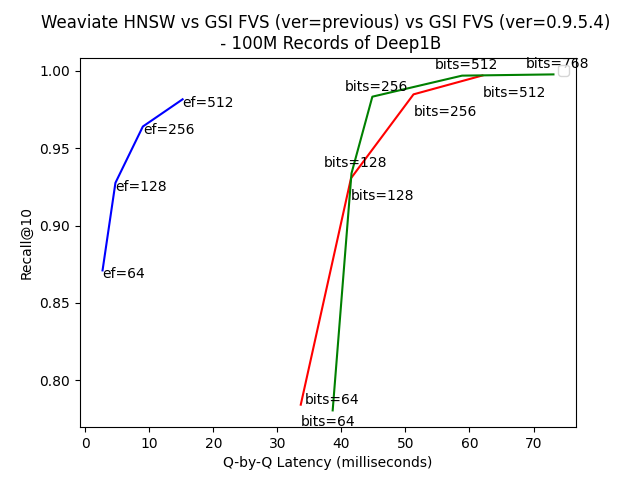

In [29]:
# 100M

# get dataframes for 100M
df_hnsw_100M = summary_hnsw_df[ summary_hnsw_df['numrecs']==100000000 ]
print(df_hnsw_100M )
df_gsi_100M  = summary_gsi_df[ summary_gsi_df['numrecs']==100000000 ]
print(df_gsi_100M )
df_latest_100M = x[x['numrecs']==100000000]
print(df_latest_100M)

# extract the lines for plotting
paretto_hnsw_parameters = list(df_hnsw_100M ['ef'])
paretto_hnsw_search = list(df_hnsw_100M ['search_mean'])
paretto_hnsw_recall = list(df_hnsw_100M ['recall10_mean'])
print(paretto_hnsw_search, paretto_hnsw_recall)

paretto_gsi_parameters = list(df_gsi_100M ['bits'])
paretto_gsi_search = list(df_gsi_100M ['search_mean'])
paretto_gsi_recall = list(df_gsi_100M ['recall10_mean'])
print(paretto_gsi_search, paretto_gsi_recall)

paretto_latest_parameters = list(df_latest_100M ['bits'])
paretto_latest_search = list(df_latest_100M ['ts_query_walltime'])
paretto_latest_recall = list(df_latest_100M ['recall'])
print(paretto_latest_search, paretto_latest_recall)

# plot
fig, ax = plt.subplots()
ax.plot(paretto_hnsw_search, paretto_hnsw_recall,color='blue')
ax.plot(paretto_gsi_search, paretto_gsi_recall,color='red')
ax.plot(paretto_latest_search, paretto_latest_recall,color='green')

# annotate gsi
for i, bits in enumerate(paretto_gsi_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_gsi_search[i],paretto_gsi_recall[i]-0.005 ), 
            xytext=(0.0,-10),
            textcoords="offset points"
            )
    
# annotate hnsw
for i, bits in enumerate(paretto_hnsw_parameters):
    ax.annotate("ef=%d"%bits, 
            xy=(paretto_hnsw_search[i],paretto_hnsw_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )

# annotate gsi latest
for i, bits in enumerate(paretto_latest_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_latest_search[i],paretto_latest_recall[i]-0.005 ), 
            xytext=(-20,10),
            textcoords="offset points"
            )

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
plt.title("Weaviate HNSW vs GSI FVS (ver=previous) vs GSI FVS (ver=0.9.5.4) \n - 100M Records of Deep1B")
ax.legend()

fig.savefig("results/paretto_0954_100M.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    Unnamed: 0   ef    numrecs  recall10_mean  search_mean    import_time  \
8            8   64  250000000         0.8513     3.538584  855149.766747   
18          18  128  250000000         0.9123     6.187096  855149.766747   
28          28  256  250000000         0.9517    12.269014  855149.766747   
38          38  512  250000000         0.9750    42.109806  855149.766747   

        wall_time  
8   855279.656859  
18  855279.656859  
28  855279.656859  
38  855279.656859  
    Unnamed: 0  bits    numrecs  recall10_mean  search_mean   import_time  \
14          14   128  250000000         0.8960    72.141179  13419.462200   
23          23   256  250000000         0.9767    63.741886  12914.538628   

       wall_time  
14  13419.462247  
23  12914.538675  
      numrecs  bits  ts_query_walltime  recall
35  250000000   128          60.112111  0.9008
36  250000000   256          62.912432  0.9730
37  250000000   512          93.609032  0.9982
38  250000000   768         119.49077

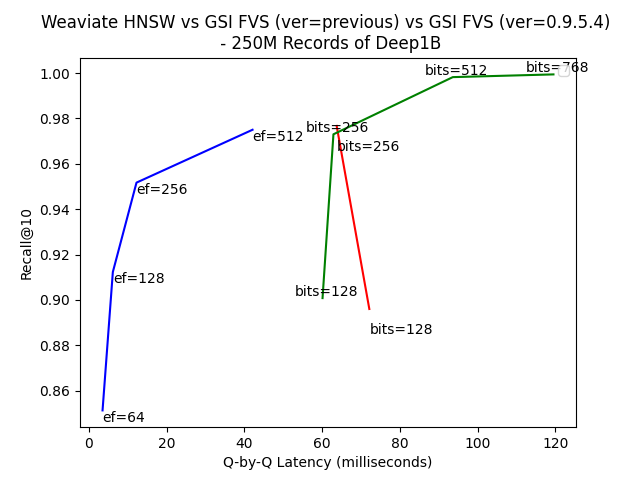

In [28]:
# 250M

# get dataframes for 100M
df_hnsw_250M = summary_hnsw_df[ summary_hnsw_df['numrecs']==250000000 ]
print(df_hnsw_250M )
df_gsi_250M  = summary_gsi_df[ summary_gsi_df['numrecs']==250000000 ]
print(df_gsi_250M )
df_latest_250M = x[x['numrecs']==250000000]
print(df_latest_250M)

# extract the lines for plotting
paretto_hnsw_parameters = list(df_hnsw_250M ['ef'])
paretto_hnsw_search = list(df_hnsw_250M ['search_mean'])
paretto_hnsw_recall = list(df_hnsw_250M ['recall10_mean'])
print(paretto_hnsw_search, paretto_hnsw_recall)

paretto_gsi_parameters = list(df_gsi_250M ['bits'])
paretto_gsi_search = list(df_gsi_250M ['search_mean'])
paretto_gsi_recall = list(df_gsi_250M ['recall10_mean'])
print(paretto_gsi_search, paretto_gsi_recall)

paretto_latest_parameters = list(df_latest_250M ['bits'])
paretto_latest_search = list(df_latest_250M ['ts_query_walltime'])
paretto_latest_recall = list(df_latest_250M ['recall'])
print(paretto_latest_search, paretto_latest_recall)

# plot
fig, ax = plt.subplots()
ax.plot(paretto_hnsw_search, paretto_hnsw_recall,color='blue')
ax.plot(paretto_gsi_search, paretto_gsi_recall,color='red')
ax.plot(paretto_latest_search, paretto_latest_recall,color='green')

# annotate gsi
for i, bits in enumerate(paretto_gsi_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_gsi_search[i],paretto_gsi_recall[i]-0.005 ), 
            xytext=(0.0,-10),
            textcoords="offset points"
            )
    
# annotate hnsw
for i, bits in enumerate(paretto_hnsw_parameters):
    ax.annotate("ef=%d"%bits, 
            xy=(paretto_hnsw_search[i],paretto_hnsw_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )

# annotate gsi latest
for i, bits in enumerate(paretto_latest_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_latest_search[i],paretto_latest_recall[i]-0.005 ), 
            xytext=(-20,10),
            textcoords="offset points"
            )

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
plt.title("Weaviate HNSW vs GSI FVS (ver=previous) vs GSI FVS (ver=0.9.5.4) \n - 250M Records of Deep1B")
ax.legend()

fig.savefig("results/paretto_0954_250M.png")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


    Unnamed: 0   ef    numrecs  recall10_mean  search_mean   import_time  \
9            9   64  500000000         0.8314     8.593629  1.556734e+06   
19          19  128  500000000         0.8983    11.130874  1.556734e+06   
29          29  256  500000000         0.9402    47.821046  1.556734e+06   
39          39  512  500000000         0.9656    22.098475  1.556734e+06   

       wall_time  
9   1.556877e+06  
19  1.556877e+06  
29  1.556877e+06  
39  1.556877e+06  
    Unnamed: 0  bits    numrecs  recall10_mean  search_mean   import_time  \
15          15   128  500000000         0.8685    79.771007  24141.563112   
24          24   256  500000000         0.9635   113.749056    661.277671   
32          32   512  500000000         0.9952   158.350539  26066.118713   

       wall_time  
15  24141.563170  
24    661.277726  
32  26066.118766  
      numrecs  bits  ts_query_walltime  recall
39  500000000   128          88.759544  0.8662
40  500000000   256         104.428370  0.964

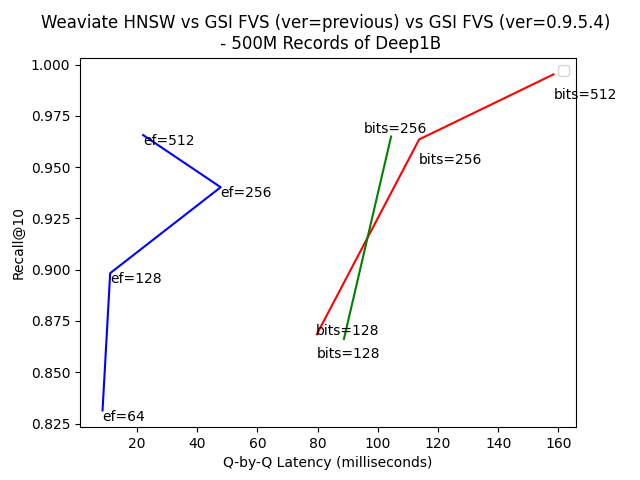

In [30]:
# 500M

# get dataframes for 100M
df_hnsw_500M = summary_hnsw_df[ summary_hnsw_df['numrecs']==500000000 ]
print(df_hnsw_500M )
df_gsi_500M  = summary_gsi_df[ summary_gsi_df['numrecs']==500000000 ]
print(df_gsi_500M )
df_latest_500M = x[x['numrecs']==500000000]
print(df_latest_500M)

# extract the lines for plotting
paretto_hnsw_parameters = list(df_hnsw_500M ['ef'])
paretto_hnsw_search = list(df_hnsw_500M ['search_mean'])
paretto_hnsw_recall = list(df_hnsw_500M ['recall10_mean'])
print(paretto_hnsw_search, paretto_hnsw_recall)

paretto_gsi_parameters = list(df_gsi_500M ['bits'])
paretto_gsi_search = list(df_gsi_500M ['search_mean'])
paretto_gsi_recall = list(df_gsi_500M ['recall10_mean'])
print(paretto_gsi_search, paretto_gsi_recall)

paretto_latest_parameters = list(df_latest_500M ['bits'])
paretto_latest_search = list(df_latest_500M ['ts_query_walltime'])
paretto_latest_recall = list(df_latest_500M ['recall'])
print(paretto_latest_search, paretto_latest_recall)

# plot
fig, ax = plt.subplots()
ax.plot(paretto_hnsw_search, paretto_hnsw_recall,color='blue')
ax.plot(paretto_gsi_search, paretto_gsi_recall,color='red')
ax.plot(paretto_latest_search, paretto_latest_recall,color='green')

# annotate gsi
for i, bits in enumerate(paretto_gsi_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_gsi_search[i],paretto_gsi_recall[i]-0.005 ), 
            xytext=(0.0,-10),
            textcoords="offset points"
            )
    
# annotate hnsw
for i, bits in enumerate(paretto_hnsw_parameters):
    ax.annotate("ef=%d"%bits, 
            xy=(paretto_hnsw_search[i],paretto_hnsw_recall[i]-0.005 ), 
            xytext=(0.0,0.0),
            textcoords="offset points"
            )

# annotate gsi latest
for i, bits in enumerate(paretto_latest_parameters):
    ax.annotate("bits=%d"%bits, 
            xy=(paretto_latest_search[i],paretto_latest_recall[i]-0.005 ), 
            xytext=(-20,10),
            textcoords="offset points"
            )

ax.set_xlabel("Q-by-Q Latency (milliseconds)")
ax.set_ylabel("Recall@10")
plt.title("Weaviate HNSW vs GSI FVS (ver=previous) vs GSI FVS (ver=0.9.5.4) \n - 500M Records of Deep1B")
ax.legend()

fig.savefig("results/paretto_0954_500M.png")